In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


styles_df = pd.read_csv("/content/styles.csv", on_bad_lines='skip')   # Product descriptions and metadata
images_df = pd.read_csv("/content/images.csv")                         # Image filenames and URLs


images_df['id'] = images_df['filename'].str.replace('.jpg', '', regex=False).astype(int)


merged_df = pd.merge(styles_df, images_df, on='id')


filtered_df = merged_df[merged_df['articleType'].isin(['Tshirts', 'Kurta Sets','Sarees','Trousers','Watches','Sandals','Kurtas','Swimwear','Nightdress','Shirts'])]


filtered_df.loc[:, 'label'] = filtered_df['articleType'].map({
    'Tshirts': 0, 'Kurta Sets': 1, 'Sarees': 2, 'Trousers': 3,
    'Watches': 4, 'Sandals': 5, 'Kurtas': 6, 'Swimwear': 7,
    'Nightdress': 8, 'Shirts': 9
})


reduced_df = filtered_df.groupby('label', group_keys=False).apply(
    lambda x: x.sample(min(20, len(x)), random_state=42)
).reset_index(drop=True)


final_df = reduced_df[['id','articleType', 'productDisplayName', 'link', 'label']]
final_df['id']=final_df.index

final_df.to_csv("final_products.csv", index=False)



<ipython-input-1-667e8e6a1784>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'label'] = filtered_df['articleType'].map({
<ipython-input-1-667e8e6a1784>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reduced_df = filtered_df.groupby('label', group_keys=False).apply(
<ipython-input-1-667e8e6a1784>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [ ]:
data = pd.read_csv("final_products.csv")

data

,id,articleType,productDisplayName,link,label
0,0,Tshirts,Locomotive Men Printed Blue T-shirt,http://assets.myntassets.com/v1/images/style/p...,0
1,1,Tshirts,Ed Hardy Men Printed Red Tshirts,http://assets.myntassets.com/v1/images/style/p...,0
2,2,Tshirts,Inkfruit Men Grey Melange Printed T-shirt,http://assets.myntassets.com/v1/images/style/p...,0
3,3,Tshirts,Gini and Jony Boys Black T-shirt,http://assets.myntassets.com/v1/images/style/p...,0
4,4,Tshirts,Locomotive Men Beige T-shirt,http://assets.myntassets.com/v1/images/style/p...,0
...,...,...,...,...,...
192,192,Shirts,Turtle Men Check Red Shirt,http://assets.myntassets.com/v1/images/style/p...,9
193,193,Shirts,Wrangler Women Holly Checks Shirt,http://assets.myntassets.com/v1/images/style/p...,9
194,194,Shirts,Indigo Nation Men Bling Blue Shirt,http://assets.myntassets.com/v1/images/style/p...,9
195,195,Shirts,Indigo Nation Men Check Purple Shirts,http://assets.myntassets.com/v1/images/style/p...,9


In [ ]:
data['label'].value_counts()

,count
label,
0,20
1,20
2,20
3,20
4,20
5,20
6,20
8,20
9,20


In [ ]:
data['articleType'].value_counts()

,count
articleType,
Tshirts,20
Kurta Sets,20
Sarees,20
Trousers,20
Watches,20
Sandals,20
Kurtas,20
Nightdress,20
Shirts,20


In [ ]:
import os
import requests
import pandas as pd
from PIL import Image
from io import BytesIO
from tqdm import tqdm

def download_images(data, output_folder="images"):
    os.makedirs(output_folder, exist_ok=True)
    df=data
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        url = row['link']
        file_name = os.path.join(output_folder, f"{idx}.jpg")
        try:
            response = requests.get(url, timeout=5)
            img = Image.open(BytesIO(response.content)).convert('RGB')
            img.save(file_name)
        except Exception as e:
            print(f"Failed to download {url}: {e}")
    print("✅ Images downloaded to:", output_folder)

download_images(data)


  5%|▌         | 10/197 [00:06<04:22,  1.40s/it]

Failed to download http://assets.myntassets.com/v1/images/style/properties/ec6f593d952a3854353dedfc1533fcbd_images.jpg: HTTPConnectionPool(host='assets.myntassets.com', port=80): Read timed out. (read timeout=5)


100%|██████████| 197/197 [00:45<00:00,  4.38it/s]

✅ Images downloaded to: images


In [ ]:
import pandas as pd
import os

# Paths
image_dir = "/content/images"
image_files = sorted(os.listdir(image_dir))
image_ids = [int(os.path.splitext(f)[0]) for f in image_files]


df = pd.read_csv("/content/final_products.csv")


df = df[df["id"].isin(image_ids)].copy()

# Add file info
df["filename"] = df["id"].astype(str) + ".jpg"
df["filepath"] = df["filename"].apply(lambda x: os.path.join(image_dir, x))
df.rename(columns={"articleType": "product_name", "productDisplayName": "description"}, inplace=True)


df.to_csv("product_data.csv", index=False)
print("[✅] Matched CSV generated with", len(df), "products.")







[✅] Matched CSV generated with 196 products.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
import cv2

# Load model
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract image features
def extract_image_features(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = model.predict(x)
        return features.flatten()
    except Exception as e:
        print(f"[ERROR] Could not process {img_path}: {e}")
        return np.zeros(512)  # fallback


df = pd.read_csv("product_data.csv")

# Extract image features
print("[INFO] Extracting image features...")
image_features = np.array([extract_image_features(fp) for fp in df["filepath"]])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[INFO] Extracting image features...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine name + description
df['combined'] = df['product_name'].astype(str) + " " + df['description'].astype(str)

# Vectorize
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
df['label'].unique()
df['product_name'].unique()

array(['Tshirts', 'Kurta Sets', 'Sarees', 'Trousers', 'Watches',
       'Sandals', 'Kurtas', 'Swimwear', 'Nightdress', 'Shirts'],
      dtype=object)

🛍️ Original Product: Kurtas - Vishudh Women Green White & Green Kurta

🏆 Top Recommendations:
👉 Kurtas - Vishudh Women Black & White Kurta (Score: 0.68)
👉 Kurtas - ALayna Women Green Kurta (Score: 0.61)
👉 Kurta Sets - Vishudh Women Green & Black Churidar Kurta with Dupatta (Score: 0.59)
👉 Kurtas - W Women Solid Green Kurtas (Score: 0.58)


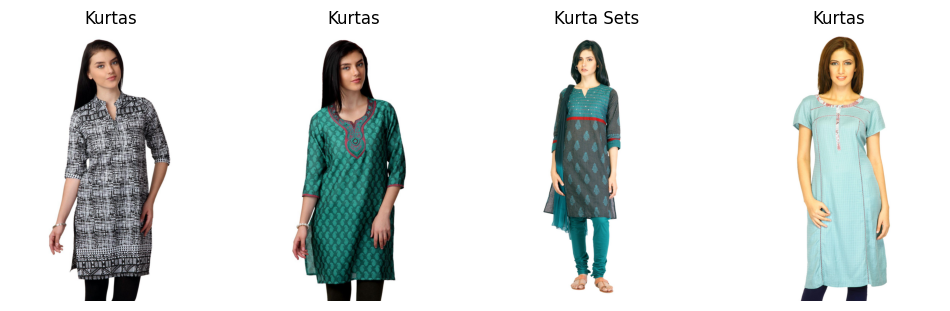

In [ ]:
# Example of storing the recommended indices
last_recommended_indices = []

def recommend_by_id(product_id):
    if product_id not in df['label'].values:
        print(f"[❌] No product found with id = {product_id}")
        return

    product_index = df[df['label'] == product_id].index[0]
    print(f"🛍️ Original Product: {df.iloc[product_index]['product_name']} - {df.iloc[product_index]['description']}")

    # Get similarity scores
    similarity_scores = list(enumerate(cosine_sim[product_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    count = 0
    print("\n🏆 Top Recommendations:")
    for i, score in similarity_scores:
        if i != product_index:  # Exclude the original product
            print(f"👉 {df.iloc[i]['product_name']} - {df.iloc[i]['description']} (Score: {round(score, 2)})")
            last_recommended_indices.append(i)  # Store the recommended indices
            count += 1
        if count == 4:
            break

def show_recommended_images():
    if not last_recommended_indices:
        print("No recommendations to show.")
        return

    # Show images
    plt.figure(figsize=(12, 3 * len(last_recommended_indices)))
    for i, idx in enumerate(last_recommended_indices):
        try:
            img_path = df.iloc[idx]['filepath']
            img = Image.open(img_path)
            plt.subplot(1, len(last_recommended_indices), i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{df.iloc[idx]['product_name']}")
        except Exception as e:
            print(f"Error displaying image {idx}: {e}")
    plt.show()

# Use the functions
recommend_by_id(6)  # Replace with a valid product_id
show_recommended_images()


In [ ]:
!pip install streamlit
!pip install pandas numpy matplotlib scikit-learn Pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from PIL import Image
import os
import matplotlib.pyplot as plt

# Load your dataset (assuming product_data.csv is already generated)
df = pd.read_csv("product_data.csv")



# Combine name + description
df['combined'] = df['product_name'].astype(str) + " " + df['description'].astype(str)

# Vectorize
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Assume you have your cosine similarity matrix calculated already (you should do this earlier in your app)
# Example: cosine_sim = cosine_similarity(features_matrix)

# Function to recommend products by ID
def recommend_by_id(product_id):
    # Check if product_id exists in 'label' column of df
    if product_id not in df['label'].values:
        st.write(f"[❌] No product found with id = {product_id}")
        return []

    # Get the index of the product
    product_index = df[df['label'] == product_id].index[0]
    st.write(f"🛍️ Original Product: {df.iloc[product_index]['product_name']} - {df.iloc[product_index]['description']}")

    # Get similarity scores

    similarity_scores = list(enumerate(cosine_sim[product_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Recommend top 3 similar products (excluding itself)
    count = 0
    recommended_indices = []
    st.write("\n🏆 Top Recommendations:")
    for i, score in similarity_scores:
        if i != product_index:  # Exclude the original product
            st.write(f"👉 {df.iloc[i]['product_name']} - {df.iloc[i]['description']} (Score: {round(score, 2)})")
            recommended_indices.append(i)  # Store the recommended indices
            count += 1
        if count == 4:
            break
    return recommended_indices

# Function to show images of recommended products
def show_recommended_images(indices):
    if not indices:
        st.write("No recommendations to show.")
        return

    st.write("Showing recommended products' images:")
    fig, axes = plt.subplots(1, len(indices), figsize=(12, 3))

    if len(indices) == 1:
        axes = [axes]  # Make axes iterable for a single recommendation

    for i, idx in enumerate(indices):
        try:
            img_path = df.iloc[idx]['filepath']
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f"{df.iloc[idx]['product_name']}")
        except Exception as e:
            st.write(f"Error displaying image {idx}: {e}")

    st.pyplot(fig)


# Streamlit layout
st.title("Fashion Product Recommendation System")
st.image('/content/fashion.jpg')
st.write("Enter a product ID to get recommendations.")
# Set custom background image
def set_bg(image_url):
    st.markdown(
        f"""
        <style>
        .stApp {{
            background-image: url("{image_url}");
            background-attachment: fixed;
            background-size: cover;
        }}
        </style>
        """,
        unsafe_allow_html=True
    )
st.markdown("""
    <style>
    .stApp {
        color: white;
    }
    </style>
    """, unsafe_allow_html=True)
# Example: Use a local or online image URL
# For local image inside "images" folder, use base64 (see below)
set_bg("https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3JtMTk1LTM5My1teW50LTE2YS5qcGc.jpg")

# Input for product ID
product_id = st.number_input("Enter Product ID", min_value=0, max_value=int(df['label'].max()), value=0, step=1)

if st.button('Recommend'):
    # Get recommendations
    recommended_indices = recommend_by_id(product_id)

    # Show images of recommended products
    show_recommended_images(recommended_indices)


Overwriting app.py


In [ ]:
!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.16.122.201


In [ ]:
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦your url is: https://polite-socks-dream.loca.lt
^C
